# 4.9: Intro to Data Visualization with Python

## Importing Libs

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Dataset

In [2]:
# importing orders_products_customers_merge
path = r'C:\Users\shyou\3D Objects\My Original Data Sources\Achievement4\March-2023 Instacart Basket Analysis'

In [3]:
orders_products_customers_merge = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customers_merge.pkl'))

In [6]:
orders_products_customers_merge.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,dep_mean_order,user_mean_payment,user_spender_flag,user_median_order,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,17.225802,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,17.225802,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,17.225802,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,17.811403,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Slowest day,Most orders,8,New customer,17.811403,7.988889,Low spender,19.0,Regular customer,both


## Creating Bar Chart

<AxesSubplot:>

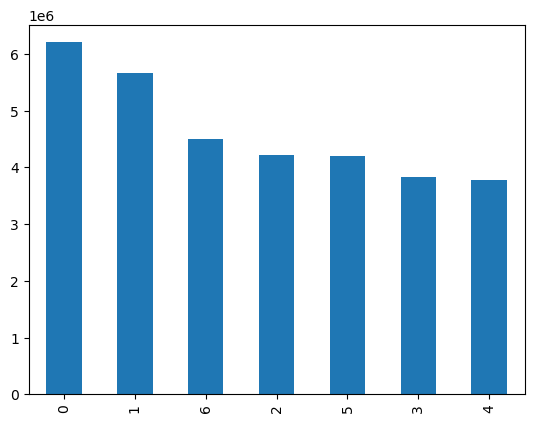

In [7]:
orders_products_customers_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Amount of order in each day of week'}, ylabel='amount'>

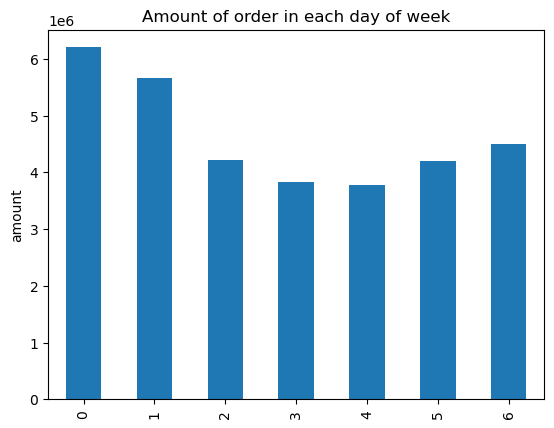

In [9]:
orders_products_customers_merge['order_day_of_week'].value_counts().sort_index().plot.bar(title = 'Amount of order in each day of week' , ylabel = 'amount')


In [9]:
orders_products_customers_merge['order_day_of_week'].value_counts(dropna = False).sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

<AxesSubplot:title={'center':'Amount of order in each day of week'}, xlabel='days of week ,0 = Saturday... ', ylabel='amount'>

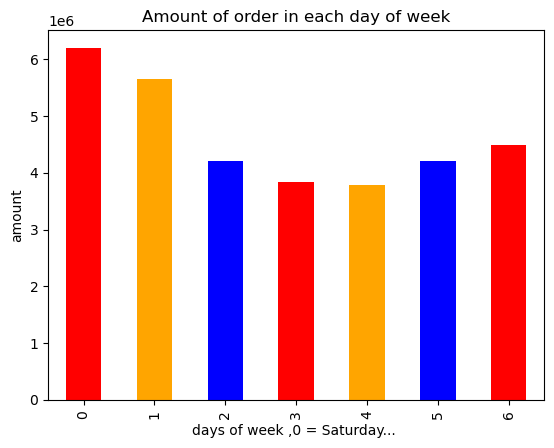

In [10]:
orders_products_customers_merge['order_day_of_week'].value_counts().sort_index().plot.bar(title = 'Amount of order in each day of week' , ylabel = 'amount', xlabel = 'days of week ,0 = Saturday... '
,color = ['red', 'orange' , 'blue'])

## Save & Export bar

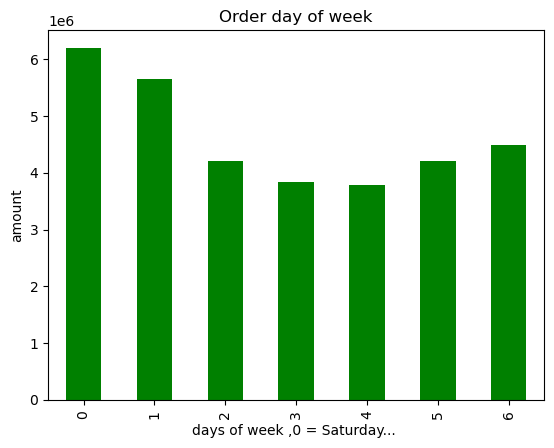

In [4]:
bar = orders_products_customers_merge['order_day_of_week'].value_counts().sort_index().plot.bar(title = 'Order day of week' , ylabel = 'amount', xlabel = 'days of week ,0 = Saturday... '
,color = ['green'])

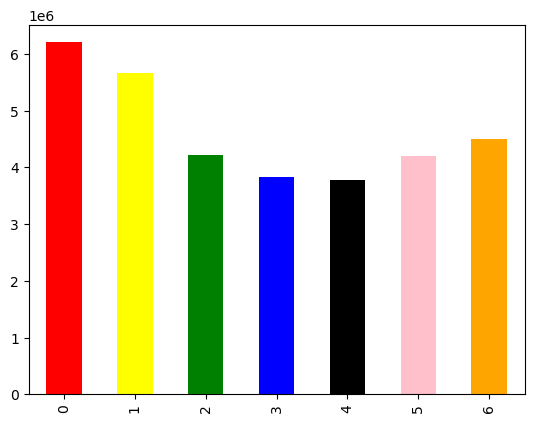

In [12]:
bar.figure

In [5]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

# Creating Histogram and Scatterplot

<AxesSubplot:ylabel='Frequency'>

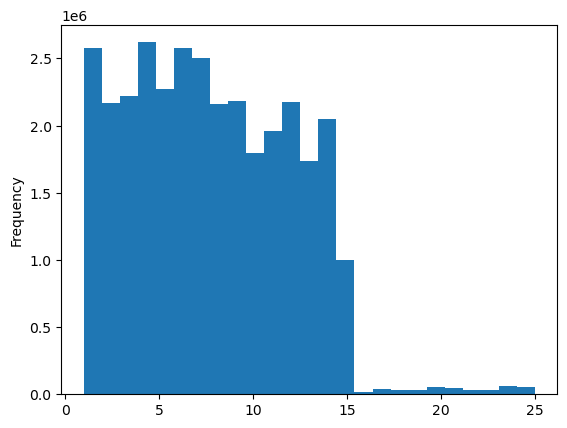

In [14]:
orders_products_customers_merge['prices'].plot.hist(bins = 25)


In [15]:
orders_products_customers_merge['prices'].describe()


count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

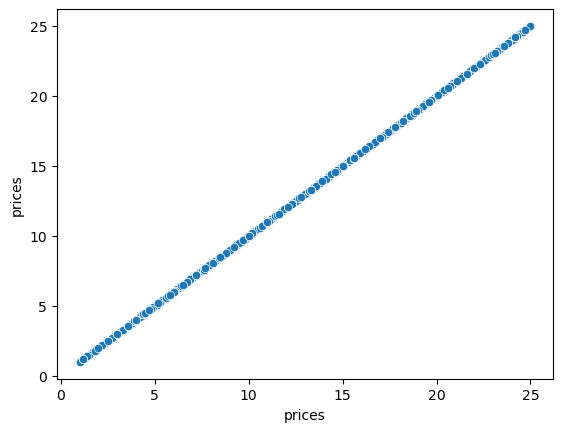

In [36]:
sns.scatterplot(x = 'prices', y = 'prices',data = orders_products_customers_merge)


In [19]:
orders_products_customers_merge.loc[orders_products_customers_merge['prices'] > 100]

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,dep_mean_order,user_mean_payment,user_spender_flag,user_median_order,order_frequency_flag,_merge


In [21]:
orders_products_customers_merge.loc[orders_products_customers_merge['prices'] >100, 'prices'] = np.nan


In [22]:
orders_products_customers_merge['prices'].max()

25.0

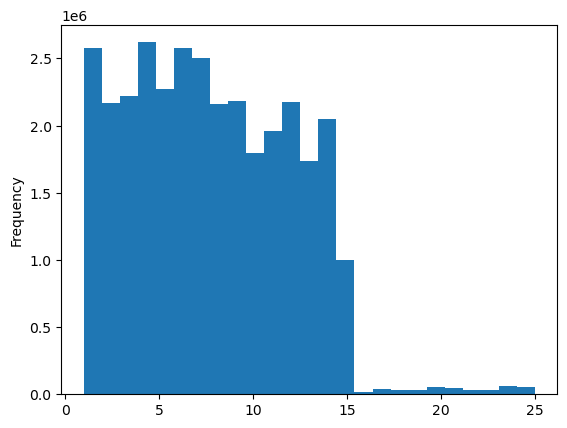

In [23]:
hist = orders_products_customers_merge['prices'].plot.hist(bins = 25)

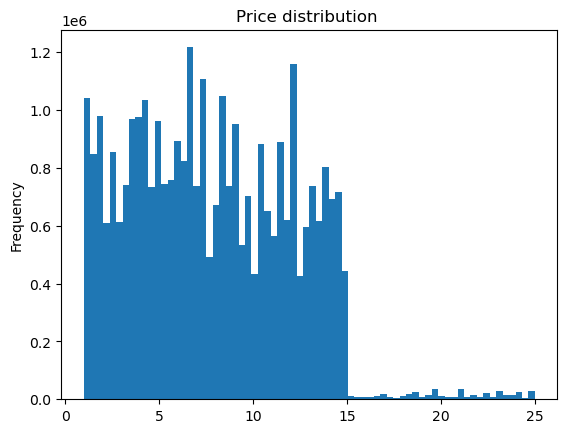

In [16]:
hist_2 = orders_products_customers_merge['prices'].plot.hist(bins = 70 , title = 'Price distribution ')

In [17]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## Creating Line Chart


### Sampling Data


In [19]:
np.random.seed(4)
dev = np.random.rand(len(orders_products_customers_merge)) <= 0.7

In [21]:
big = orders_products_customers_merge[dev]

In [22]:
small = orders_products_customers_merge[~dev]

In [23]:
len(orders_products_customers_merge)

32404859

In [24]:
len(big) + len(small)

32404859

In [25]:
df_2 = small[['order_day_of_week','prices']]

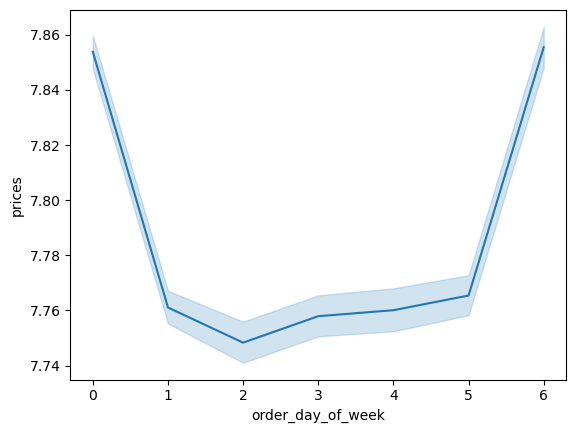

In [28]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices' )


In [29]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))

In [33]:
orders_products_customers_merge.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,dep_mean_order,user_mean_payment,user_spender_flag,user_median_order,order_frequency_flag,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,17.225802,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,17.225802,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Busiest day,Most orders,8,New customer,17.225802,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Most orders,8,New customer,17.811403,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Slowest day,Most orders,8,New customer,17.811403,7.988889,Low spender,19.0,Regular customer,both


In [34]:
orders_products_customers_merge.shape

(32404859, 31)

# Task

In [35]:
# 3.You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column

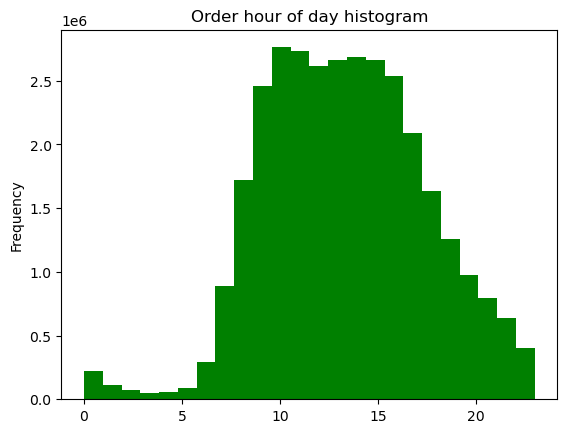

In [30]:
hist_order_hour_of_day = orders_products_customers_merge['order_hour_of_day'].plot.hist(bins = 24 , color = 'green' , title = 'Order hour of day histogram')

In [31]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

#### Histograms are useful for understanding the shape of the data distribution in a dataset. This histogram has a left-skewed shape and it shows hours 10 and 11 have the most frequent, and hours 3 and 4 have the lowest frequency in the data set.In fact, the highest number of orders were registered at 10 and 11, and the lowest number of orders was at 3 and 4.

In [48]:
# 4.The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

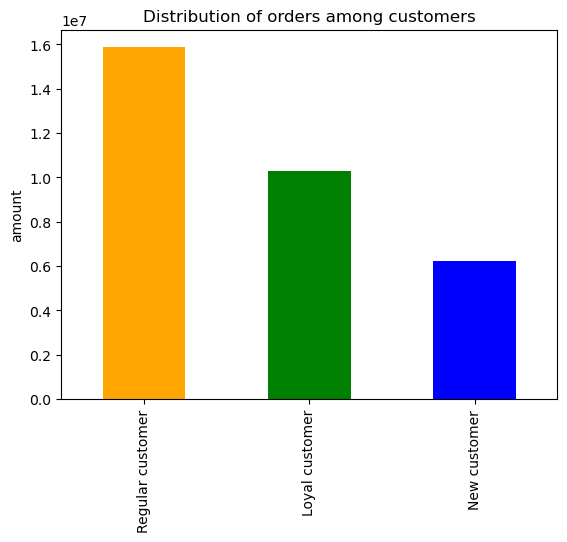

In [32]:
bar_loyalty_flag = orders_products_customers_merge['loyalty_flag'].value_counts().plot.bar(color = ['orange', 'green', 'blue'], title = 'Distribution of orders among customers' , ylabel = 'amount')

In [52]:
# 5.Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [34]:
np.random.seed(5)
dev_1 = np.random.rand(len(orders_products_customers_merge)) <= 0.7

In [35]:
big_1 = orders_products_customers_merge[dev_1]

In [36]:
small_1 = orders_products_customers_merge[~dev_1]

In [37]:
df_3 = small_1[['order_hour_of_day','prices']]

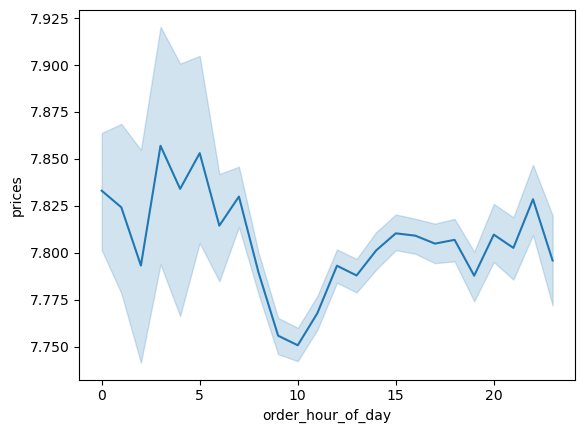

In [39]:
line_ohod_prices = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices' )


In [66]:
#6.Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

In [67]:
# First, determine whether there’s a connection between age and family situation by creating a line chart

In [84]:
df_4 = small_1[['age','num_of_dependants']]

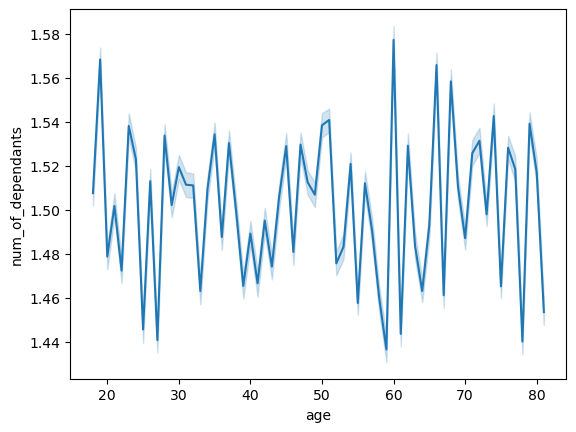

In [96]:
line_age_dependants = sns.lineplot(data = df_4, x = 'age',y = 'num_of_dependants')


##### There is no clear and definable relationship between age and the number of dependents.

In [87]:
# 7.You’ll also need to explore whether there’s a connection between age and spending power (income).

In [88]:
df_5 = small_1[['age','income']]

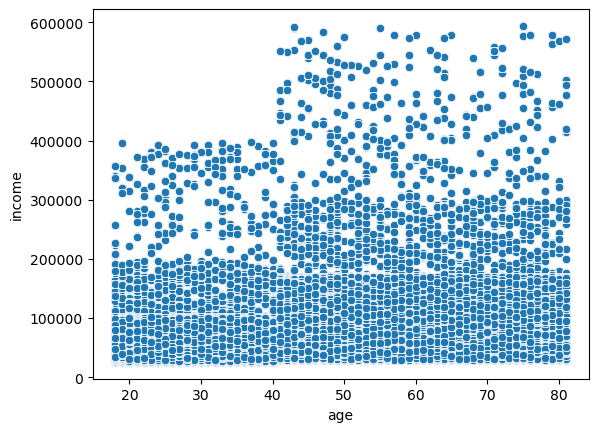

In [89]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_5)

##### It seems that there is a positive relationship between age and income. The highest incomes belong to the age group of 40 and above.
##### The density range of income in all ages is up to 200,000. Of course, the age group of 40 and over has another income density of up to 300,000.

## Export visualizations

In [93]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [33]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

In [95]:
line_ohod_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ohod_prices.png'))

In [97]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [98]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))